# Instalando pacotes

In [2]:
# Install requirements
!pip install --upgrade pip
!pip install pandas
!pip install matplotlib
!pip install numpy

# Importando dependências e a base que será utilizada no projeto

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

credit_risk = pd.read_csv('german_credit_risk_mineração_BI.csv')

# Initial Database
credit_risk.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# Análise Exploratória de Dados

In [4]:
# View all Dimensions
dimensions = credit_risk.shape
print(f'Dimensions: {dimensions}')

Dimensions: (1000, 11)


In [5]:
# Some Statistics from credit risk
credit_risk.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


> Observando já com o `describe` consigo entender alguns números:

. As idades variam em média cerca de 11.4 anos em relação à média que é de 35.5 anos

. Os valores de crédito tem uma dispersão bem alta

. A duração dos empréstimos varia em média cerca de 12 meses

# Perguntas de Estatística Descritiva e Pré-processamento


### 1. Qual é a média, mediana e desvio padrão da idade dos clientes?

In [6]:
# Describe only for Age column
describe_age_clients = credit_risk['Age'].describe()
describe_age_clients

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [7]:
# Separating only Age statistics with mean, median and std
mean_age = credit_risk['Age'].mean()
median_age = credit_risk['Age'].median()
std_age = credit_risk['Age'].std()

# Transforming to DataFrame
statistics_age =  np.array([mean_age, median_age, std_age])
df_age = pd.DataFrame(statistics_age, index=['mean', 'median', 'std'], columns=['Age'])
df_age

,Age
mean,35.546000
median,33.000000
std,11.375469


### Resposta:

. **Média**: 35,5

. **Mediana**: 33

. **Desvio Padrão**: 11,4

### 2. Qual é a distribuição de valores nulos nas colunas `Saving accounts` e `Checking account`?

In [8]:
# Getting NaN values from columns: Saving accounts and Checking account
saving_accounts_isnull = credit_risk['Saving accounts'].isna().sum()
checking_account_isnull = credit_risk['Checking account'].isna().sum()
# Transforming to DataFrame
distributions_accounts_null = np.array([saving_accounts_isnull, checking_account_isnull])
df_null = pd.DataFrame(distributions_accounts_null, index=['Saving accounts', 'Checking account'], columns=['Null'])
df_null

,Null
Saving accounts,183
Checking account,394


<Axes: title={'center': 'Number of NaNs per Column'}, xlabel='Columns', ylabel='Null Values'>

<Figure size 1000x600 with 0 Axes>

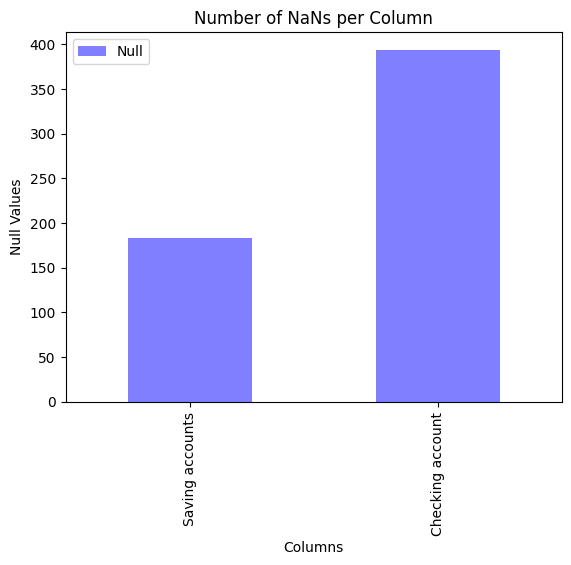

In [9]:
# Plot For better visualization
plt.figure(figsize=(10, 6))
df_null.plot(kind='bar',
             title='Number of NaNs per Column',
             xlabel='Columns',
             alpha=0.5,
             ylabel='Null Values',
             color='blue')

### Resposta

. Saving accounts: 183

. Checking account: 394

### 3. Qual é a proporção de clientes por categoria de `Sex` e `Housing`?

In [10]:
# Getting the proportion of clients
sex_proportion = credit_risk['Sex'].value_counts(normalize=True) * 100
housing_proportion = credit_risk['Housing'].value_counts(normalize=True) * 100

In [11]:
# Sex proportion
sex_proportion

Sex
male      69.0
female    31.0
Name: proportion, dtype: float64

In [12]:
# Housing proportion
housing_proportion

Housing
own     71.3
rent    17.9
free    10.8
Name: proportion, dtype: float64

### Resposta

> Proporção de clientes por sexo:

. Homens: 69%

. Mulheres: 31%

> Proporção de clientes por moradia:

. Casa própria: 71,3%

. Aluguel: 17,9%

. Moradia de graça: 10,8%

### 4. Quais são os valores mínimos, máximos e quartis da coluna `Credit amount`? Existem outliers?

In [23]:
# Calculating Individually the min, max, std and IQR
min_credit = credit_risk['Credit amount'].min()
max_credit = credit_risk['Credit amount'].max()
std_credit = credit_risk['Credit amount'].std().round(2)

# Print the values
print(f'Min: {min_credit}')
print(f'Max: {max_credit}')
print(f'Std: {std_credit}')

Min: 250
Max: 18424
Std: 2822.74


In [21]:
# Calculating IQR
q1_credit = credit_risk['Credit amount'].quantile(0.25)
q2_credit = credit_risk['Credit amount'].quantile(0.50)
q3_credit = credit_risk['Credit amount'].quantile(0.75)

# Print values
print(f'Q1: {q1_credit}')
print(f'Q2: {q2_credit}')
print(f'Q3: {q3_credit}')

IQR = q3_credit - q1_credit
print(f'IQR: {IQR}')

inf_limit = q1_credit - 1.5 * IQR
sup_limit = q3_credit + 1.5 * IQR

outliers = credit_risk[(credit_risk['Credit amount'] < inf_limit) |
                      (credit_risk['Credit amount'] > sup_limit)]
print(f"\nNumber of outliers: {len(outliers)}")


Q1: 1365.5
Q2: 2319.5
Q3: 3972.25
IQR: 2606.75

Number of outliers: 72


### Resposta
> Utilizei algumas opções para achar os valores mínimo, máximo e quartis. Poderia ter usado o `describe()` também:

. Mínimo: 250

. Máximo: 18424

. Número total de Outliers: 72 clientes

> O Q1, Q2 e Q3 foram utilizados para calcular a percentage dos dados que estão abaixo, mediana e acima do valor.

### 5. Como está distribuído o tempo de `Duration` dos empréstimos (média, mediana, outliers)?

### 6. Quais são as categorias de `Purpose` mais frequentes e as suas porcentagens?

### 7. Qual é a proporção de clientes com risco `good` e `bad`?

### 8. Existe diferença na média do `Credit amount` entre clientes com diferentes categorias de `Saving accounts`?

### 9. A idade média difere entre clientes classificados como `good` e `bad` risco?

### 10. Como se relacionam `Job` e `Housing`? Qual categoria de moradia é mais comum em cada tipo de trabalho?